# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

- numpy
- pandas
- matplotlib
- seaborn

In [2]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
## 동일 경로에 "train.csv"가 있다는 가정하에 데이터 불러오기

titanic_df = pd.read_csv("train.csv")


## 1. 분석의 목적과 변수 확인

### 분석의 목적 
- 살아남은 사람들은 어떤 특징을 가지고 있었을까?

### 변수 확인
: Data - data dictionary 부분 참고할 것  

- 각 variable 들의 의미 파악 : 각 variable들은 하나의 column임
- key값으로는 어떤값들이 있는지 확인 (숫자로 encoding 되어있는 경우: 그 숫자의 의미)
- variable notes: 더 세부적으로 설명해놓은 것.

In [9]:
## 데이터가 제대로 불러와졌는지 확인하기 -> 상위 몇개만 출력해보기
## 결즉치에 유의해서 보기

titanic_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [12]:
## 각 column의 data type 확인하기
## string이라고 생각한 값들이 object라는 것을 확인가능

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [14]:
## 데이터 전체 정보를 얻는 함수: .describe()
## -> 수치형 데이터에 대한 요약만을 제공함에 유의할 것

titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

#### 위 데이터를 통해서 유추할 수 있는 것들

- survived - mean = 0.38 : 생존자수보다 사망자수가 더 많다
- age : mean = 평균연령이 29살, std = 14.5, min = 탑승자들 중 가장 어렸던 아이가 0.4살, max = 가장 나이가 많았던 사람이 80살
- sibsp : mean = 평균 0.5명의 형제자매. 배우자가 있었음, max = 최대 8명인 사람도 있었음
- parch : mean = 평균 0.38, max = 최대 6명의 자녀,부모를 갖은 가족도 있었음
- fare : mean = 평균 32불을 지불하고 탑승, min = 공짜로 탄 사람도 있었음, max = 최대 512불을 지불하고 탄 사람도 있었음, std = 49 (표준편차가 매우 큰편)

In [15]:
## 상관계수 확인

titanic_df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

#### 위 데이터를 통해 유추할 수 있는 것들

- 주의: main diagnol = 1 (자기자신과의 상관계수이므로)
- 절댓값이 가장 큰 것: Fare과 Pclass = 0.54 -> 더 높은 등급일수록 (작은값) 더 비쌀 것이므로 = 음의 상관관계 (반비례)
- Pclass와 Survived : 등급이 더 높을수록 더 생존하지 않았을까 의심해볼 수 있음


#### 주의사항
: Correlation is NOT Causation
- 상관성 : A up -> B up
- 인과성 : A -> B

In [81]:
## 결측치 확인 -> 결측치를 어떻게 처리하고 바라볼지도 추후 결정해야함

titanic_df.isnull()   #null = True, null이 아니면 False 반환 
titanic_df.isnull().sum()   # null값이 있는지 없는지 확인가능 (null이 없으면 0, null값이 있으면 갯수만큼의 양수 출력)

# 결과 : Cabin, Age, Embarked에 결측치 존재함을 알 수 있음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### 1.Survived Column

In [25]:
## 생존자, 사망자 수는 각각 몇명일까?

titanic_df["Survived"].sum()  # 생존자는 1로 표기되므로 sum의 결과는 생존자수가 됨
titanic_df["Survived"].value_counts()  # 각 value별로 개수를 count해줌 (0 = 사망자수, 1 = 생존자수)

0    549
1    342
Name: Survived, dtype: int64

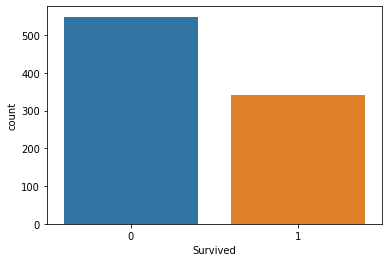

In [26]:
## 생존자수와 사망자수를 Barplot으로 그려보기 -> sns.countplot() 이용

sns.countplot(x="Survived", data=titanic_df)  # Survived가 categorical하므로 각 값별로 개수를 세어서 그래프로 나타내줌
plt.show()

### 2. Pclass

In [39]:
## Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()    #각 등급별 인원수 확인가능

Survived
Pclass          
1            216
2            184
3            491

In [42]:
## 각 등급별 생존자수 확인

titanic_df[['Pclass','Survived']].groupby(['Pclass']).sum()   # 생존자 = 1로 표기 -> sum값 = 생존자수

Survived
Pclass          
1            136
2             87
3            119

In [43]:
## 각 등급별 생존확률 구하기 :  등급별 생존자수 / 각 등급별 전체 탑승객수 -> 평균구하기

titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean()  # mean = sum / count이므로

# 결과: 등급이 높을수록 생존자비율이 높은 것을 확인할 수 있음

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

[]

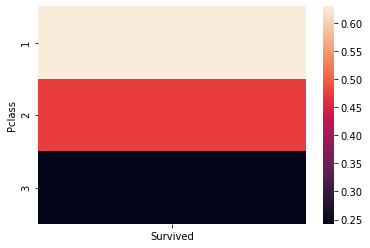

In [45]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.plot()

# 연한색 = 생존비율이 높음, 진한색 = 생존비율이 낮음을 의미

### 3. Sex

In [46]:
# 성별별 생존자수 구하기

titanic_df.groupby(['Survived','Sex']).count()  #생존자수, 사망자수별로 남여 숫자를 알 수 있음

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [48]:
titanic_df.groupby(['Survived','Sex'])['Survived'].count()   #다른 column은 제외하고 survived만 보기위해서

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

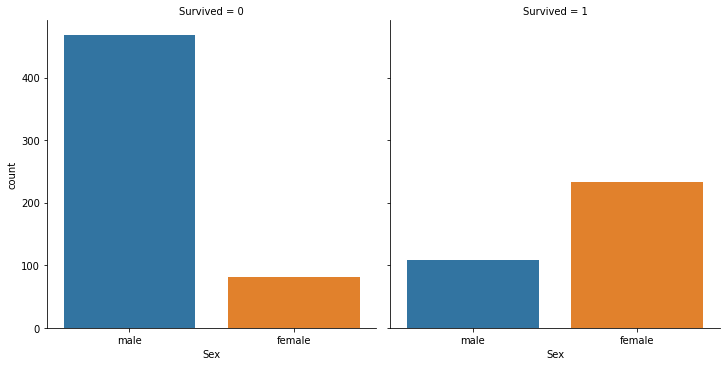

In [52]:
## sns.catplot 이용하기

sns.catplot(x='Sex', col="Survived", kind='count', data=titanic_df)   #column을 지정함으로써 두개의 그래프를 그릴 수 있음
plt.show()

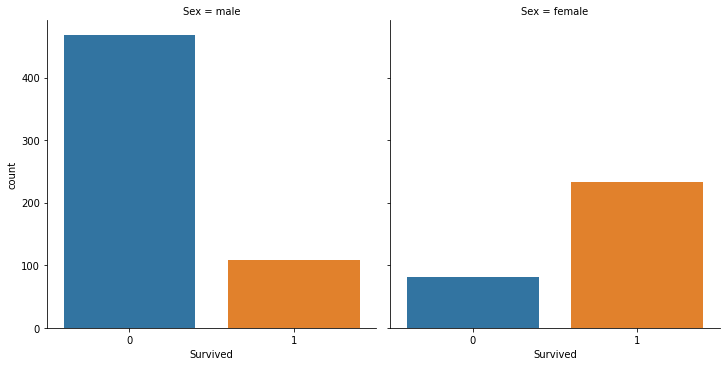

In [54]:
## sns.catplot 이용하기

sns.catplot(x='Survived', col="Sex", kind='count', data=titanic_df)   #위와 달리 남여를 기준으로 각각 사망자수와 생존자수를 그려봄
plt.show()

### 4. Age

- 주의: 결측지 존재!!

In [56]:
## 나이 = 대표적 연속적인 데이터이므로 describe 사용해서 통계적 수치 확인

titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

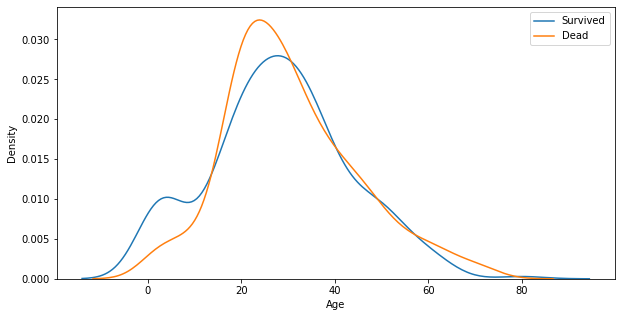

In [63]:
## Survived 1, 0과 Age의 경향성
# figure -> axis -> plot

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived==1]['Age'],ax=ax)   #생존자의 나이 분포를 선으로 표현
sns.kdeplot(x=titanic_df[titanic_df.Survived==0]['Age'],ax=ax)   #사망자의 나이 분포를 선으로 표현
plt.legend(['Survived','Dead'])

plt.show()


# 결과: 차이가 많이 나는 구간: 어린아이의 경우, 청년의 경우, 노인의 경우 
# 어린아이는 사망자수보다 생존자수가 많았고
# 청년과 노인의 경우 생존자수보다 사망자수가 많았음

### Appendix 1. Sex + Pclass & Survived


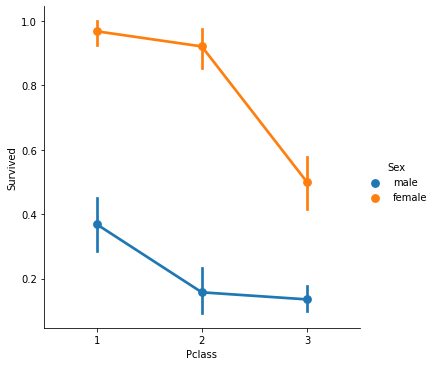

In [68]:
# sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)   #신뢰구간 = 선으로 표현됨

sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()

# 여성의 경우가 생존확률이 더 높았음을 알 수 있다. 그리고 전체적으로 class가 높을수록 생존자가 더 많았다.


### Appendix 2: Age + Pclass



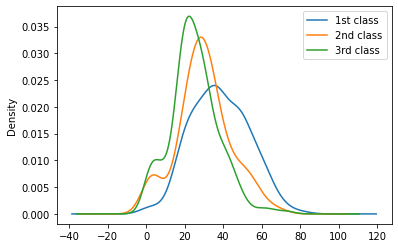

In [71]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')     # 1등급 탑승자수의 나이분포 확인가능
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')     # 2등급 탑승자수의 나이분포 확인가능
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')     # 3등급 탑승자수의 나이분포 확인가능

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

# 결과: 등급이 높아질수록 나이대가 높아짐을 확인할 수 있음

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

## 필사

### 1. Describing Data

In [74]:
## 각 column별 데이터타입, non-null count 출력

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
## numerical value - distribution 파악하기

titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

#### 알 수 있는 사실

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

In [80]:
## categorical value - distribution 파악하기

titanic_df.describe(include = ['O'])

Name   Sex    Ticket        Cabin  \
count                                     891   891       891          204   
unique                                    891     2       681          147   
top     Asplund, Master. Clarence Gustaf Hugo  male  CA. 2343  C23 C25 C27   
freq                                        1   577         7            4   

       Embarked  
count       889  
unique        3  
top           S  
freq        644

#### 알 수 있는 사실

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

** unique = 서로 다른 값들의 갯수    
** top = 가장 많이 등장하는 value  
** freq = 가장 많이 등장한 value가 등장한 횟수

### 2. Correlating

In [82]:
## 상관관계 알아보기 => corr()

titanic_df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

#### 생존과 상관이 관련없다고 생각되는 것들 -> DROP

- Ticket : contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
- Cabin : highly incomplete or contains many null values both in training and test dataset.
- PassengerId : does not contribute to survival.
- Name : may not contribute directly to survival, so maybe dropped.


In [84]:
### Pclass와 Survived의 상관관계 

titanic_df[['Survived','Pclass']].groupby(['Pclass']).mean()   # mean = sum/count

# 결과 : 등급이 높을수록 생존확률이 높았음

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

In [97]:
### Sex와 Survived의 상관관계

titanic_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [99]:
titanic_df[['Survived','Sex']].groupby(['Sex']).mean()

# 결과: 여성 생존률이 남성 생존률보다 압도적으로 높음을 알 수 임ㅅ음

Survived
Sex             
female  0.742038
male    0.188908

In [104]:
### SibSp와 Survived의 상관관계

titanic_df[['Survived','SibSp']].groupby(['SibSp']).mean()

# 결과: 형제나 배우자가 0~2명일때 생존률이 높았음, 5-8명인 경우 생존률 = 0 

Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000

[]

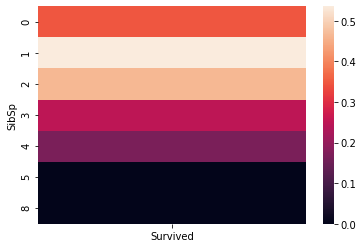

In [106]:
sns.heatmap(titanic_df[['Survived','SibSp']].groupby(['SibSp']).mean())
plt.plot()

In [105]:
### Parch와 Survived의 상관관계

titanic_df[['Survived','Parch']].groupby(['Parch']).mean()

# 결과: 1-3명의 부모,자식관계일때 생존률이 높았음. -> 상관관계 뚜렷하지 않음

Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000

[]

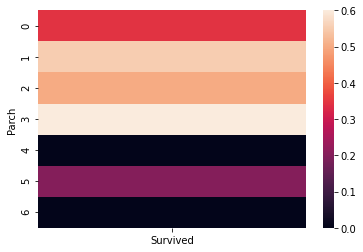

In [107]:
sns.heatmap(titanic_df[['Survived','Parch']].groupby(['Parch']).mean())
plt.plot()